<a href="https://colab.research.google.com/github/HarshithaMudam/ML_project/blob/main/Detection_of_Emotion_in_Text1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import seaborn as sns
import nltk
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


READING CSV FILE

In [ ]:
df = pd.read_csv('/text_emotion.csv')

EXPLORING DATA

In [ ]:
df.shape

(40000, 4)

In [ ]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [ ]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [ ]:
# check for missing values using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


PREPROCESSING DATA

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
vectorizer = CountVectorizer(stop_words='english')
preprocessed_data = []
for text in df['content']:
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords, lowercase, and stem
    words = [stemmer.stem(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Join the words back into a single string
    preprocessed_data.append(' '.join(words))

X = vectorizer.fit_transform(df['content'])
y = df['sentiment']
# Split the data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



In [ ]:
validation_scores,testing_scores,training_score=[],[],[]


MNB

# New Section

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
training_score.append(accuracy*100)
print("Accuracy on training data:", accuracy*100)
y_test_pred = mnb.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
testing_scores.append(test_score*100)
print('Test score:', test_score*100)
y_val_pred = mnb.predict(X_val)
val_score = accuracy_score(y_val, y_val_pred)
validation_scores.append(val_score*100)
print('Validation score:', val_score*100)



Accuracy on training data: 58.72083333333333
Test score: 30.8125
Validation score: 30.725


SVM

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
training_score.append(accuracy*100)
print("Accuracy on training data:", accuracy*100)
y_test_pred = svm.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
testing_scores.append(test_score*100)
print('Test score:', test_score*100)
y_val_pred = svm.predict(X_val)
val_score = accuracy_score(y_val, y_val_pred)
validation_scores.append(val_score*100)
print('Validation score:', val_score*100)


Accuracy on training data: 91.52083333333333
Test score: 31.15
Validation score: 31.0125


RANDOM FOREST

In [ ]:
rd = RandomForestClassifier(n_estimators=100,random_state=42)
rd.fit(X_train, y_train)
y_pred_train = rd.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
training_score.append(accuracy*100)
print("Accuracy on training data:", accuracy*100)
y_test_pred = rd.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
testing_scores.append(test_score*100)
print('Test score:', test_score*100)
y_val_pred = rd.predict(X_val)
val_score = accuracy_score(y_val, y_val_pred)
validation_scores.append(val_score*100)
print('Validation score:', val_score*100)



Accuracy on training data: 99.2625
Test score: 32.15
Validation score: 31.825


In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (K) as needed
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
training_score.append(accuracy*100)
print("Accuracy on training data:", accuracy*100)
y_test_pred = knn.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
testing_scores.append(test_score*100)
print('Test score:', test_score*100)
y_val_pred = knn.predict(X_val)
val_score = accuracy_score(y_val, y_val_pred)
validation_scores.append(val_score*100)
print('Validation score:', val_score*100)

Accuracy on training data: 62.4
Test score: 24.349999999999998
Validation score: 23.4375


PERFORMANCE METRICS

In [ ]:
models=[' Multinomial Naive Bayes','Support Vector Machines','Random Forest','KNeighborsClassifier']
from tabulate import tabulate
data = []
for i in range(len(models)):
    data.append([models[i],training_score[i],testing_scores[i], validation_scores[i]])

# Print the table
print(tabulate(data, headers=['Model','Train_Score', 'Test_Score', 'Validation_Score']))

Model                      Train_Score    Test_Score    Validation_Score
-----------------------  -------------  ------------  ------------------
Multinomial Naive Bayes        58.7208       30.8125             30.725
Support Vector Machines        62.4          24.35               23.4375
Random Forest                  91.5208       31.15               31.0125
KNeighborsClassifier           99.2625       32.15               31.825


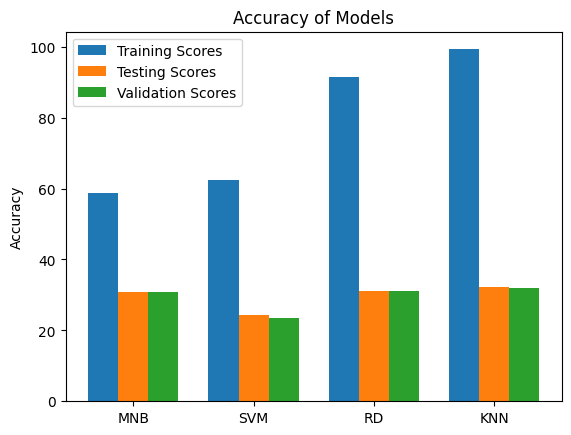

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axes objects
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.25

# Set the x-axis labels
x_labels = ['MNB', 'SVM', 'RD','KNN']

# Set the bar positions
training_pos = np.arange(len(x_labels))
testing_pos = [x + bar_width for x in training_pos]
validation_pos = [x + bar_width * 2 for x in training_pos]

# Plot the bars
ax.bar(training_pos, training_score, bar_width, label='Training Scores')
ax.bar(testing_pos, testing_scores, bar_width, label='Testing Scores')
ax.bar(validation_pos,validation_scores, bar_width, label='Validation Scores')

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the chart title and legend
ax.set_title('Accuracy of Models')
ax.legend()

# Set the x-axis labels
ax.set_xticks([x + bar_width for x in range(len(x_labels))])
ax.set_xticklabels(x_labels)

# Show the chart
plt.show()


TESTING WITH CUSTOM INPUT

In [ ]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.7 MB/s eta 0:

In [ ]:
import gradio as gr

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import gradio as gr

# Replace this function with your own emotion detection function
def detect_emotion(text):
    preprocessed_text = vectorizer.transform([text])

    # Your code here to detect emotion in the input text
    predicted_label1 = mnb.predict(preprocessed_text)[0]
    predicted_label2 = svm.predict(preprocessed_text)[0]
    predicted_label3 = rd.predict(preprocessed_text)[0]
    predicted_label4 = knn.predict(preprocessed_text)[0]

    from collections import Counter
    b = [predicted_label1, predicted_label2, predicted_label3]
    d = Counter(b)

    # Find the most common predicted emotion
    n = [i for i, j in d.items() if j == max(d.values())]

    # Define the emoji mapping
    h = {'sadness': "😞", 'surprise': "😮", 'happy': "😄", 'angry': "😡", 'fear': "😱",'fun':"😄", 'neutral': "😄", 'worry':"😄", 'enthusiasm':"😄",'empty':"😄"}

    # Return the emotion label and corresponding emoji
    detected_emotion = n[0] if n else "Unknown"
    detected_emoji = h.get(detected_emotion, "😐")

    return f"{detected_emotion} {detected_emoji}"

# Create the Gradio interface
iface = gr.Interface(
    fn=detect_emotion,
    inputs=gr.inputs.Textbox(label="Enter text"),
    outputs=gr.outputs.Textbox(label="Detected emotion"),
    title="Emotion Detector",
    description="Enter text and the model will detect the emotion in the text."
)

# Launch the interface
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c9a270511f728c8c00.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
